# Keras OCR

In [27]:
import matplotlib.pyplot as plt
import keras_ocr
import os
import cv2

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /home/aiffel-dj53/.keras-ocr/craft_mlt_25k.h5
Looking for /home/aiffel-dj53/.keras-ocr/crnn_kurapan.h5


# 1. Images List

In [9]:
credit = os.getenv('HOME') + '/aiffel/ocr_python/credit_Car.jpg'
blm = os.getenv('HOME') + '/aiffel/ocr_python/blm.jpg'
captcha1 = os.getenv('HOME') + '/aiffel/ocr_python/captcha1.jpg'
captcha2 = os.getenv('HOME') + '/aiffel/ocr_python/captcha2.jpg'
exam = os.getenv('HOME') + '/aiffel/ocr_python/exam.jpg'
handwriting = os.getenv('HOME') + '/aiffel/ocr_python/handwriting.jpg'
plaid = os.getenv('HOME') + '/aiffel/ocr_python/plaid.jpg'
stock = os.getenv('HOME') + '/aiffel/ocr_python/stock.jpg'
tess = os.getenv('HOME') + '/aiffel/ocr_python/tesseract.png'

images = [credit, blm, captcha1, captcha2, exam, handwriting, plaid, stock, tess]

In [10]:
images = [ keras_ocr.tools.read(url) for url in images]
prediction_groups = [pipeline.recognize([url]) for url in images]

/home/aiffel-dj53/anaconda3/envs/aiffel/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


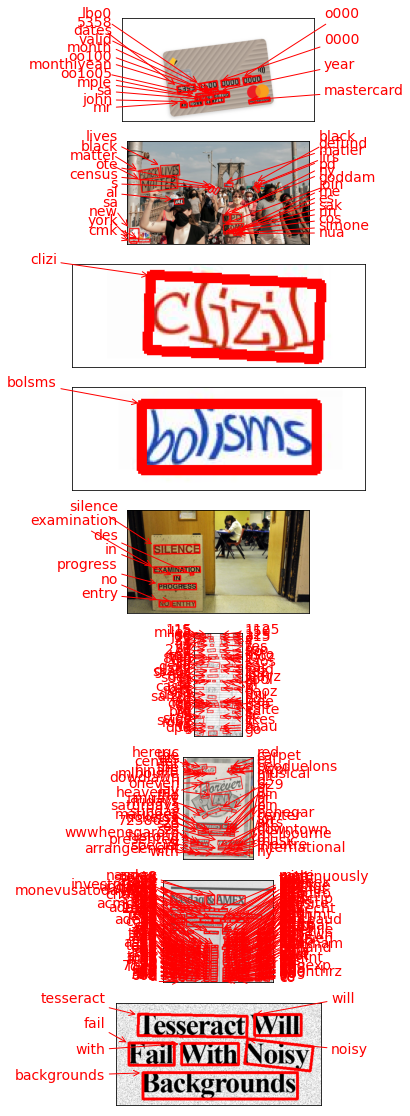

In [11]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

### ㄴ 이미지 안에 있는 텍스트를 훌륭하게 인식하여 검출했다. Tesseract가 인식하기 힘들어한다는 Noisy Background사진의 텍스트도 잘 인식되었다.

# Tesseract OCR

## 1. exam.jpg

In [22]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/exam.jpg'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/home/aiffel-dj53/aiffel/ocr_python/0000.png
/home/aiffel-dj53/aiffel/ocr_python/0001.png
/home/aiffel-dj53/aiffel/ocr_python/0002.png
/home/aiffel-dj53/aiffel/ocr_python/0003.png
/home/aiffel-dj53/aiffel/ocr_python/0004.png
/home/aiffel-dj53/aiffel/ocr_python/0005.png
/home/aiffel-dj53/aiffel/ocr_python/0006.png
/home/aiffel-dj53/aiffel/ocr_python/0007.png
/home/aiffel-dj53/aiffel/ocr_python/0008.png
/home/aiffel-dj53/aiffel/ocr_python/0009.png
/home/aiffel-dj53/aiffel/ocr_python/0010.png
/home/aiffel-dj53/aiffel/ocr_python/0011.png
/home/aiffel-dj53/aiffel/ocr_python/0012.png


### ㄴ 위에서 쓴 exam.jpg를 샘플로 사용해본다

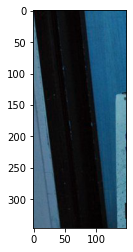

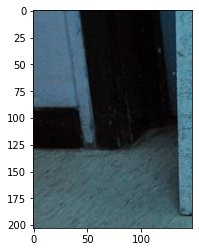

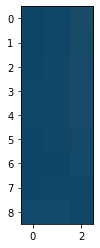

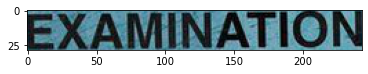

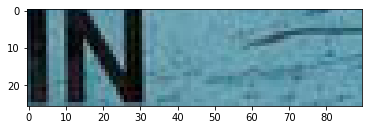

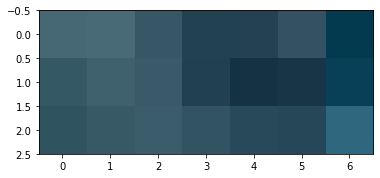

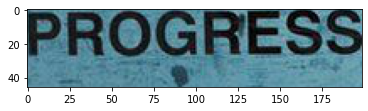

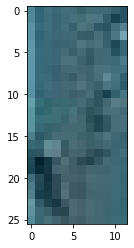

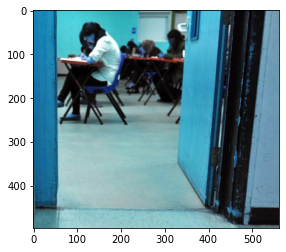

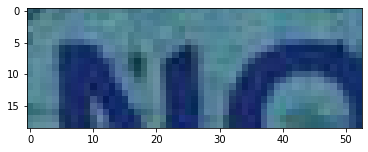

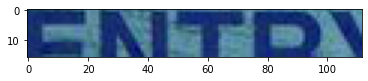

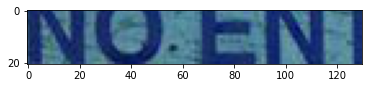

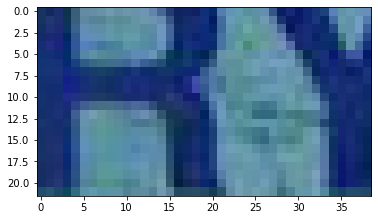

1

3

|

EX AMINATION

iN =

=

PROGRESS

a

al

nim

At? fo

Ni. iN I

-¥

Done


In [34]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for i in cropped_image_path_list:
        img = cv2.imread(i)
        plt.imshow(img)
        plt.show()
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)   

### ㄴ 텍스트의 구역 정의를 잘못한 부분이 많고 텍스트가 아닌 구역도 인식하여 잘못된 출력을 보인다.

## 2. tesseract.png

## tesseract.jpg는 테서렉트가 인식하기 힘들어하는 noisy background가 있는 이미지이다. Keras OCR에서는 이 이미지를 성공적으로 인식했었는데 테서렉트는 어떻게 인식하는지 살펴보자.

In [36]:
def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/tesseract.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/home/aiffel-dj53/aiffel/ocr_python/0000.png
/home/aiffel-dj53/aiffel/ocr_python/0001.png
/home/aiffel-dj53/aiffel/ocr_python/0002.png
/home/aiffel-dj53/aiffel/ocr_python/0003.png
/home/aiffel-dj53/aiffel/ocr_python/0004.png
/home/aiffel-dj53/aiffel/ocr_python/0005.png
/home/aiffel-dj53/aiffel/ocr_python/0006.png
/home/aiffel-dj53/aiffel/ocr_python/0007.png
/home/aiffel-dj53/aiffel/ocr_python/0008.png


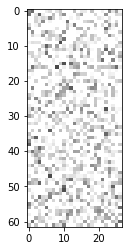

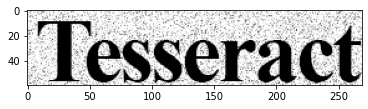

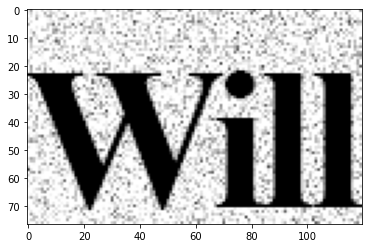

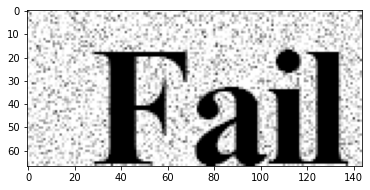

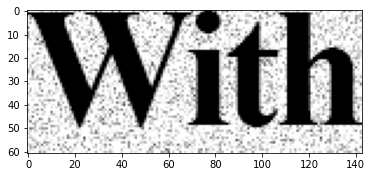

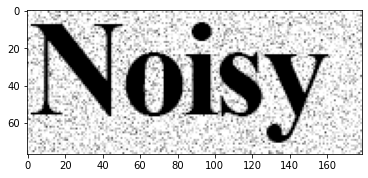

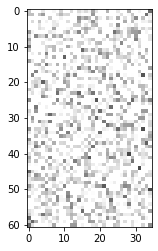

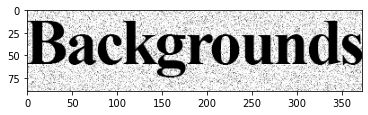

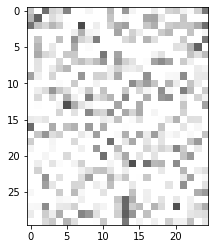


Tesseract

Will

Fail

With

Noisy


Backgrounds


Done


In [37]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for i in cropped_image_path_list:
        img = cv2.imread(i)
        plt.imshow(img)
        plt.show()
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

### ㄴ 언뜻 보면 잘 인식한것같다

In [39]:
len(cropped_image_path_list)

9

### ㄴ 하지만 자세히 보면 [Tesseract, Will, Fail, With, Noisy, Backgrounds] 로 총 6단어가 나와야하는데 9단어가 출력되어있다.

### ㄴ 추가적인 3개는 noisy background를 텍스트로 인식하여 출력되었기 때문이다. 위 함수에서 출력된 이미지들중 3개는 아무 의미없는 배경이 텍스트로 인식되어 저장된 모습을 보인다.

# 회고
---

## 1. 증권 계정을 만들거나, 보안 심사를 할때 신분증이나 여권을 인식시켜 본 경험이 종종 있엇는데 그것이 OCR이라는 것을 처음 알게 되었다.

## 2. 이러한 이미지 인식 기술은 매우 복잡할것이라는 예상과 달리 이미 잘 만들어져있는 API로 손 쉽게 접할수 있고, 코드 구성도 생각보다 어럽지 않다는 것을 배웠다.

## 3. 세가지의 OCR을 이용해보았다: Google API, Keras OCR, Tesseract.
---
### Google: 확실히 갓글이다. API를 이용하여 몇줄 안되는 코드 구성으로 훌륭한 성능을 가진 OCR을 간단히 구현할수 있게 만들어 두었다. 편리함과 우수함을 동시에 갖춘 API이다. 무료가 아니라는것이 단점인듯 하다.
### Keras OCR: Keras에 내장되어있는 모듈로 꽤 준수한 인식률을 보인다. 인식을 넘어 사진내에 어떠한 텍스트를 담고있는지 표현해주는 Image Captioning도 내장되어있어 가독성이 좋다.
### Tesseract: 3가지 중에 가장 떨어진 성능을 보여줬다. 크고 뚜렷한 텍스트가 적혀있는 이미지가 아닌이상 엄청난 오타를 내뱉었으며, 설령 그렇다 하더라도 텍스트가 아닌 부분도 텍스트로 인식하여 출력하는 모습을 보여줬다.